In [363]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [364]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math 
#import cmath #complex numbers
from numpy import random
import matplotlib.colors as mcolors
import seaborn as sns

#from decimal import *

#import sympy as sp
import mpmath as mp

#mpmath.exp(-1200)

Vamos a crear una base de datos aleatorios emtre 0 y 1. Intentaremos crear una distribución normal y de poisson para estas datos.

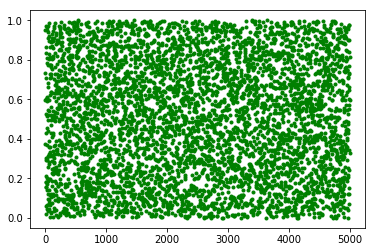

In [365]:
"""La función random.seed() nos permite tener una sucesión 
de números aleatorios pero qu estos números no van a cambiar cada vez que corramos nuestro programa.
El número que escojamos dentro del argumento de la función es la etiqueta o el nombre de los datos que estamos ecogiendo,
Es decir, si otro usuario de python en otro ordenador elige 42 y nosotros también lo hicimos ambos tendremos los mismos 
número aleatorios"""
random.seed(42)

#escogemos 5000 números aleatorios entre el 0 y el 1 de la semilla 42.
x = random.rand(5000)
#x

"""Aún no sabemos qué distribución tienen nuestros datos"""
plt.plot(x,'.',color = 'g')

Ahora haremos que nuestros datos tengan distribución normal https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal
con los datos proporcionados por el profesor.


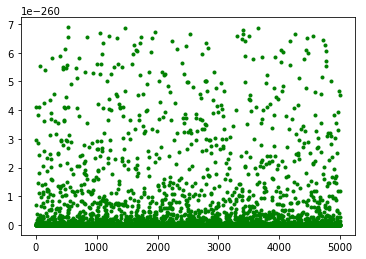

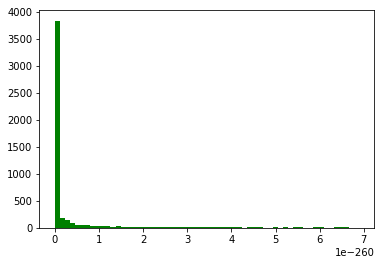

In [366]:
sigma = 2 #desviación estándar
x_avrg = 70 #promedio
n = len(x) #tamaño de la muestra

#Fómula para distribución normal
#NormalD = 0
NormalD = np.zeros(n)
for i in range(n):
    NormalD[i] = (1/(sigma*math.sqrt(2*np.pi)))*math.exp(-(1/(2*(sigma**2)))*((x[i] - x_avrg)**2))

#NormalD
plt.plot(NormalD,'.',color = 'g')
plt.show()

#La dsitribución se ve como
plt.hist(NormalD,60,color = 'g');

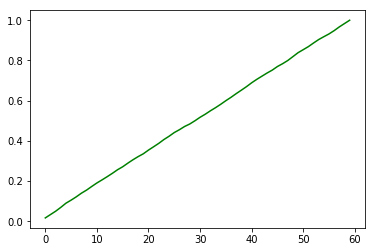

In [367]:
y =x

hist = np.histogram(y,60)[0]/n

NormalDacumm = np.zeros(len(hist))
NormalDacumm[0] = hist[0]
#Ahora haremos la distribución acumulada

for i in range(1,len(hist)):
    NormalDacumm[i] = hist[i] + NormalDacumm[i-1]

plt.plot(NormalDacumm,'-',color = 'g')
    
#NormalDacumm


In [368]:
# NormalDacumm = 0
# for i in range(n):
#     NormalDacumm = NormalDacumm + (1/(sigma*math.sqrt(2*np.pi)))*(mp.exp(-(1/(2*(sigma**2)))*((x[i] - x_avrg)**2)))
    
# plt.plot(NormalDacumm)

In [369]:
# def exp_to_sci(x):
#   coeff, exp = np.modf(x / np.log(10.0))
#   return 10**(coeff + 1), exp - 1

# z = exp_to_sci(x[i])
# z

In [370]:
# NormalDacumm1 = 0
# for i in range(n):
#     NormalDacumm1 = NormalDacumm1 + (1/(math.sqrt(2*np.pi*sigma)))*exp_to_sci(-(1/(2*(sigma**2)))*((x[i] - x_avrg)**2))

# Normal Distribution

Como no se pudo porque los valores del exponente eran muy pequeños vamos a usar las funciones que generar las distribuciones que deseamos

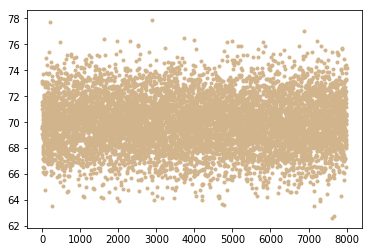

In [386]:
random.seed(42)
n1 = 8000 #size of the sample
w = np.random.normal(x_avrg, sigma, n1)
#w
plt.plot(w,'.',color = 'tan')

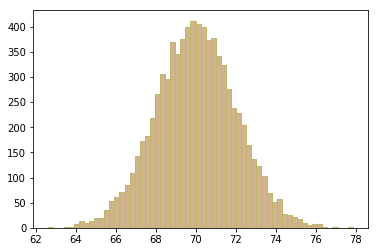

In [387]:
a1 = 60 #number of bars of our histogram
plt.hist(w,a1, color = 'tan', edgecolor = 'darkkhaki'); #shows the histogram

Ahora compararemos los datos aleatorios obtenidos con una distribución normal "perfecta"

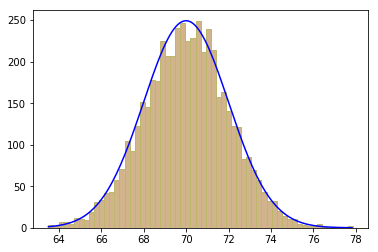

In [373]:
histograma = np.histogram(w,a1)[0]
#histograma1 = np.histogram(w,a1)[1]
#histograma1

t = np.arange(histograma1.min(),histograma1.max(), 0.1)
#t

NormalDreal = np.zeros(len(t))
for i in range(len(t)):
    NormalDreal[i] = (1/(sigma*math.sqrt(2*np.pi)))*math.exp(-(1/(2*(sigma**2)))*((t[i] - x_avrg)**2))
#NormalDreal

plt.plot(t,NormalDreal*n1/4,'b')
plt.hist(w,a1,color ='tan', edgecolor = 'darkkhaki')
plt.show()

Los datos obtenidos se acercan mucho a la distribución ideal.

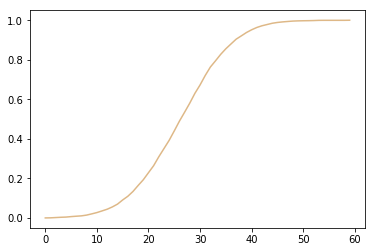

In [374]:
hist1 = np.histogram(w,a1)[0]/n #here we get the values of the data from the histogram information

NormalDacumm1 = np.zeros(len(hist1)) #Vector of zeroes for the accumulated data
NormalDacumm1[0] = hist1[0]
#-----------------------------------------
#Ahora haremos la distribución acumulada
#-----------------------------------------
for i in range(1,len(hist1)):
    NormalDacumm1[i] = hist1[i] + NormalDacumm1[i-1]

plt.plot(NormalDacumm1,'-', color = 'burlywood')
    
#NormalDacumm

# Poisson distribution
Is a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event.


$f(k,\lambda )={\frac {e^{-\lambda }\lambda ^{k}}{k!}}$


k es el número de ocurrencias del evento o fenómeno (la función nos da la probabilidad de que el evento suceda precisamente k veces).
λ es un parámetro positivo que representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado. Por ejemplo, si el suceso estudiado tiene lugar en promedio 4 veces por minuto y estamos interesados en la probabilidad de que ocurra k veces dentro de un intervalo de 10 minutos, usaremos un modelo de distribución de Poisson con λ = 10×4 = 40.

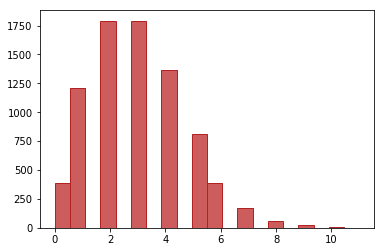

In [394]:
random.seed(42)

#l = [1,5,11] #lambdas
#k =5 #número de veces que esperemos que ocurra un evento

l1 = 3 #numero de veces promedio que realmente ocurre nuestro evento
z = np.random.poisson(l1, n1);
a2 = 20 #numero de barras

#z = np.random.poisson(lam =l,size = (n1,len(l)))
#plt.plot(z,'.',color = 'indianred')
#plt.show()
#z
plt.hist(z,a2, color = 'indianred', edgecolor = 'firebrick');

3 No es posible comparar esta distribución con alguna perfectamente bien hecha porque nos falta un dato, que es k (el número de veces que nosotros nos preguntamos si va a ocurrir algún evento).

# Distribución Binomial

En estadística, la distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de n ensayos de Bernoulli independientes entre sí, con una probabilidad fija p de ocurrencia del éxito entre los ensayos. Un experimento de Bernoulli se caracteriza por ser dicotómico, esto es, solo dos resultados son posibles. A uno de estos se denomina «éxito» y tiene una probabilidad de ocurrencia p y al otro, «fracaso», con una probabilidad q = 1 - p. En la distribución binomial el anterior experimento se repite n veces, de forma independiente, y se trata de calcular la probabilidad de un determinado número de éxitos

In [395]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------- ---
    Seed

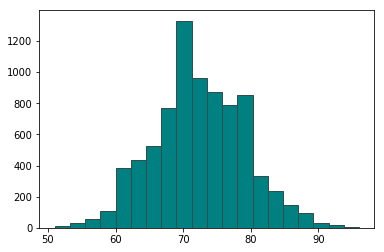

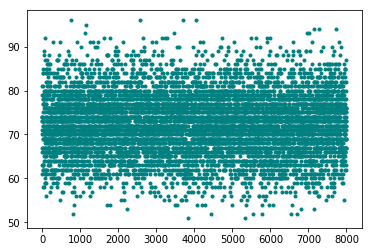

In [412]:
random.seed(42)

no_exitos = n1/42 #Número de veces que esperamos que el evento tenga exito
""""lo haremos número entero"""
float_str = float(no_exitos)
n_bin = int(float_str) #este numero ya es entero

#n1 número total de eventos

p = 0.38 #Probabilidad de tener éxito en nuestro evento

sampleBin = np.random.binomial(n_bin, p, n1)

sampleBinperfecta = np.random.binomial(n_bin, 0.5, n1)

plt.hist(sampleBin,20, color = 'teal', edgecolor = 'darkslategray');
plt.show()

plt.plot(sampleBin,'.', color = 'teal')